In [1]:
import pandas as pd
import pandas_profiling as pdp
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline


In [2]:
df=pd.read_csv("../../data/311__Service_Requests.csv", parse_dates=True, encoding='UTF-8', infer_datetime_format=True)

In [8]:
potdf = df.loc[df['TYPE'].str.contains('Pot')]

potdf['age'] =  pd.to_datetime(potdf['CLOSED_DT']) - pd.to_datetime(potdf['OPEN_DT'])
potdf['expected_age'] =  pd.to_datetime(potdf['TARGET_DT']) - pd.to_datetime(potdf['OPEN_DT'])
potdf['performance'] = potdf['expected_age'] - potdf['age'] 


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [9]:
#remove closed claims
potdf['age'] =potdf['age'].dropna()
potdf['expected_age'] = potdf['expected_age'].fillna(0)
potdf['performance'] = potdf['performance'].fillna(0)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [10]:
closedpotdf = potdf['age'].dropna()
potdf['age_in_days'] = closedpotdf.apply(lambda x: x.days if isinstance(x, pd.Timedelta) else 0)
potdf['age_in_days'] = potdf['age_in_days'].dropna()# potdf['expected_age']

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [45]:
potdf= potdf.drop('age', 1,errors='ignore')
potdf= potdf.drop('TARGET_DT', 1,errors='ignore')
potdf= potdf.drop('expected_age', 1,errors='ignore')
potdf= potdf.drop('CLOSED_DT', 1,errors='ignore')
potdf= potdf.drop('CLOSURE_REASON', 1,errors='ignore')
potdf= potdf.drop('Property_Type', 1,errors='ignore')
potdf= potdf.drop('Property_ID', 1,errors='ignore')
potdf= potdf.drop('LATITUDE', 1,errors='ignore')
potdf= potdf.drop('LONGITUDE', 1,errors='ignore')
potdf= potdf.drop('land_usage', 1,errors='ignore')
potdf= potdf.drop('OnTime_Status', 1,errors='ignore')
potdf= potdf.drop('Geocoded_Location', 1,errors='ignore')
potdf= potdf.drop('SubmittedPhoto', 1,errors='ignore')
potdf= potdf.drop('neighborhood_services_district', 1,errors='ignore')


In [17]:
non_employee_source = ['Citizens Connect App','Constituent Call', 'Self Service', 'Twitter']
cleaned_df = potdf.loc[(potdf['CASE_STATUS'] == 'Closed' ) &(potdf['Source'].isin(non_employee_source)) ]

cleaned_df

,CASE_ENQUIRY_ID,OPEN_DT,CASE_STATUS,CASE_TITLE,SUBJECT,REASON,TYPE,QUEUE,Department,SubmittedPhoto,...,city_council_district,police_district,neighborhood,ward,precinct,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Source,performance,age_in_days
137,101001943833,11/02/2016 09:13:00 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_Highway Construction,PWDx,https://mayors24.cityofboston.gov/media/boston...,...,4.0,B3,Greater Mattapan,14,1402,INTERSECTION Kingsdale St & Standish St,NaN,Citizens Connect App,-6 days +19:31:04,6.0
147,101001995955,01/25/2017 08:23:12 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 1C: Downtown,PWDx,https://mayors24.cityofboston.gov/media/boston...,...,2.0,A1,Back Bay,Ward 5,0501,42 Fayette St,2116.0,Citizens Connect App,-1 days +19:52:37,1.0
257,101002012985,02/14/2017 11:51:00 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,BWSC_Pothole,BWSC,NaN,...,9.0,D4,Roxbury,8,0803,INTERSECTION Melnea Cass Blvd & Harrison Ave,NaN,Constituent Call,-13 days +22:51:24,13.0
393,101001346580,04/01/2015 09:31:49 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 05: South Boston,PWDx,https://mayors24.cityofboston.gov/media/boston...,...,2.0,C6,South Boston / South Boston Waterfront,Ward 6,0601,1-1 Gillette Park,2127.0,Citizens Connect App,0 days 22:01:05,0.0
413,101000367313,12/23/2011 08:09:26 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 10B: Roxbury,PWDx,NaN,...,7.0,B2,Roxbury,Ward 9,0905,17-19 Lambert Ave,2119.0,Citizens Connect App,3 days 21:44:33,0.0
524,101001086086,05/10/2014 08:48:09 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 08: Hyde Park,PWDx,NaN,...,5.0,E18,Hyde Park,Ward 18,1806,24 Blake St,2126.0,Constituent Call,1 days 21:51:59,2.0
582,101001743667,03/10/2016 09:36:00 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 02: Jamaica Plain,PWDx,NaN,...,4.0,E18,Roslindale,18,1807,INTERSECTION Canterbury St & American Legion Hwy,NaN,Constituent Call,0 days 00:06:28,0.0
609,101001960006,11/28/2016 03:29:00 PM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 07: South Dorchester,PWDx,NaN,...,5.0,B3,Greater Mattapan,Ward 18,1804,7 Hopkins Pl,2126.0,Constituent Call,0 days 05:20:39,0.0
612,101001321073,03/02/2015 10:26:26 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 06: West Roxbury and Roslindale,PWDx,NaN,...,5.0,E5,Roslindale,Ward 20,2001,INTERSECTION Ardale St & Selwyn St,NaN,Constituent Call,-1 days +01:50:12,1.0
756,101001022791,02/10/2014 09:21:14 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 1B: North End,PWDx,NaN,...,1.0,A1,Downtown / Financial District,Ward 3,0302,25 Charter St,2113.0,Constituent Call,0 days 19:51:38,1.0


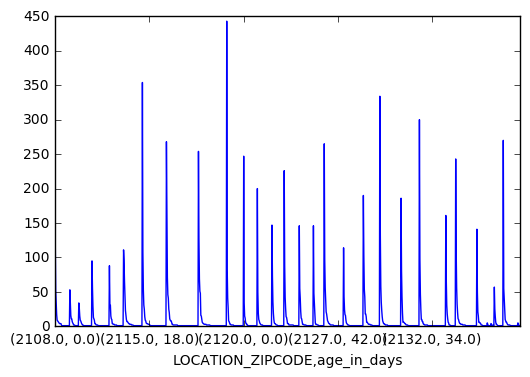

In [33]:
cleaned_df.groupby('LOCATION_ZIPCODE').age_in_days.value_counts().plot()

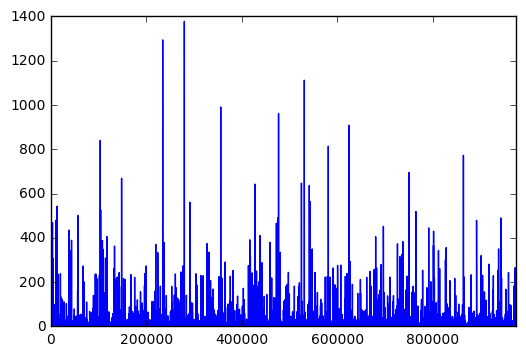

In [37]:
cleaned_df['age_in_days'].plot()

In [46]:
cleaned_df

,CASE_ENQUIRY_ID,OPEN_DT,CASE_STATUS,CASE_TITLE,SUBJECT,REASON,TYPE,QUEUE,Department,SubmittedPhoto,...,city_council_district,police_district,neighborhood,ward,precinct,LOCATION_STREET_NAME,LOCATION_ZIPCODE,Source,performance,age_in_days
137,101001943833,11/02/2016 09:13:00 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_Highway Construction,PWDx,https://mayors24.cityofboston.gov/media/boston...,...,4.0,B3,Greater Mattapan,14,1402,INTERSECTION Kingsdale St & Standish St,NaN,Citizens Connect App,-6 days +19:31:04,6.0
147,101001995955,01/25/2017 08:23:12 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 1C: Downtown,PWDx,https://mayors24.cityofboston.gov/media/boston...,...,2.0,A1,Back Bay,Ward 5,0501,42 Fayette St,2116.0,Citizens Connect App,-1 days +19:52:37,1.0
257,101002012985,02/14/2017 11:51:00 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,BWSC_Pothole,BWSC,NaN,...,9.0,D4,Roxbury,8,0803,INTERSECTION Melnea Cass Blvd & Harrison Ave,NaN,Constituent Call,-13 days +22:51:24,13.0
393,101001346580,04/01/2015 09:31:49 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 05: South Boston,PWDx,https://mayors24.cityofboston.gov/media/boston...,...,2.0,C6,South Boston / South Boston Waterfront,Ward 6,0601,1-1 Gillette Park,2127.0,Citizens Connect App,0 days 22:01:05,0.0
413,101000367313,12/23/2011 08:09:26 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 10B: Roxbury,PWDx,NaN,...,7.0,B2,Roxbury,Ward 9,0905,17-19 Lambert Ave,2119.0,Citizens Connect App,3 days 21:44:33,0.0
524,101001086086,05/10/2014 08:48:09 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 08: Hyde Park,PWDx,NaN,...,5.0,E18,Hyde Park,Ward 18,1806,24 Blake St,2126.0,Constituent Call,1 days 21:51:59,2.0
582,101001743667,03/10/2016 09:36:00 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 02: Jamaica Plain,PWDx,NaN,...,4.0,E18,Roslindale,18,1807,INTERSECTION Canterbury St & American Legion Hwy,NaN,Constituent Call,0 days 00:06:28,0.0
609,101001960006,11/28/2016 03:29:00 PM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 07: South Dorchester,PWDx,NaN,...,5.0,B3,Greater Mattapan,Ward 18,1804,7 Hopkins Pl,2126.0,Constituent Call,0 days 05:20:39,0.0
612,101001321073,03/02/2015 10:26:26 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 06: West Roxbury and Roslindale,PWDx,NaN,...,5.0,E5,Roslindale,Ward 20,2001,INTERSECTION Ardale St & Selwyn St,NaN,Constituent Call,-1 days +01:50:12,1.0
756,101001022791,02/10/2014 09:21:14 AM,Closed,Request for Pothole Repair,Public Works Department,Highway Maintenance,Request for Pothole Repair,PWDx_District 1B: North End,PWDx,NaN,...,1.0,A1,Downtown / Financial District,Ward 3,0302,25 Charter St,2113.0,Constituent Call,0 days 19:51:38,1.0
